<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        FLIGHT FARE PREDICTION
    </h2>
    </div>

![](https://feeds.abplive.com/onecms/images/uploaded-images/2021/09/08/634259599cd6f60c24f9e67a5680c064_original.jpg)

# ✈️ Séance 5 – Régression Linéaire : Prédiction du Prix des Billets d’Avion
**Date :** 07/08/2025

---

## Objectifs pédagogiques
- Comprendre le fonctionnement de la régression linéaire
- Appliquer un pipeline complet de data science
- Évaluer les performances du modèle
- Interpréter les résultats de la modélisation

## ✅ Checklist des compétences visées

| Compétence | Acquise ? |
|------------|-----------|
| Importation & exploration des données | ☐ |
| Prétraitement (Nettoyage, Transformation) | ☐ |
| Encodage des variables catégorielles | ☐ |
| Visualisation des relations | ☐ |
| Régression linéaire multiple avec sklearn | ☐ |
| Évaluation des performances (RMSE, R²) | ☐ |
| Interprétation des coefficients | ☐ |


# **Comment le prix est-il affecté lorsque les billets sont achetés seulement 1 jour ou 30 jours avant le départ ?**

## **Caractéristiques du jeu de données**
Les différentes caractéristiques du jeu de données nettoyé sont décrites ci-dessous :

* Airline : Le nom de la compagnie aérienne est stocké dans la colonne airline. C’est une variable catégorielle comportant 6 compagnies différentes.

* Flight : La colonne flight contient le code de vol de l’avion. Il s’agit d’une variable catégorielle.

* Source City : Ville de départ du vol. C’est une variable catégorielle avec 6 villes uniques.

* Departure Time : Il s’agit d’une variable catégorielle dérivée, obtenue en regroupant les heures de départ en plages horaires. Elle comporte 6 étiquettes temporelles distinctes.

* Stops : Variable catégorielle à 3 modalités distinctes, indiquant le nombre d’escales entre la ville de départ et la ville d’arrivée.

* Arrival Time : Variable catégorielle dérivée, créée en regroupant les heures d’arrivée en plages horaires. Elle contient 6 étiquettes temporelles distinctes.

* Destination City : Ville d’arrivée du vol. C’est une variable catégorielle avec 6 villes uniques.

* Class : Variable catégorielle indiquant la classe du siège. Elle contient deux modalités : Business et Economy.

* Duration : Variable continue représentant la durée totale du voyage entre les villes (en heures).

* Days Left : Caractéristique dérivée, calculée en soustrayant la date de réservation de la date du voyage.

* Price : Variable cible contenant le prix du billet.

In [ ]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 """

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n "

In [ ]:
# Lets see what is in the Data
df=pd.read_csv('flight_dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
# Size of the data
df.shape

(300153, 11)

In [ ]:
# A Quick Information abou the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.isna().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


## **Le prix et les variables quantitatives**

In [ ]:
# Stastical Description of Data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df[["days_left", "duration", "price"]].corr()
# On peut remarquer ici une corrélation modérée entre le prix et les nombre de jours restant

,days_left,duration,price
days_left,1.000000,-0.039157,-0.091949
duration,-0.039157,1.000000,0.204222
price,-0.091949,0.204222,1.000000


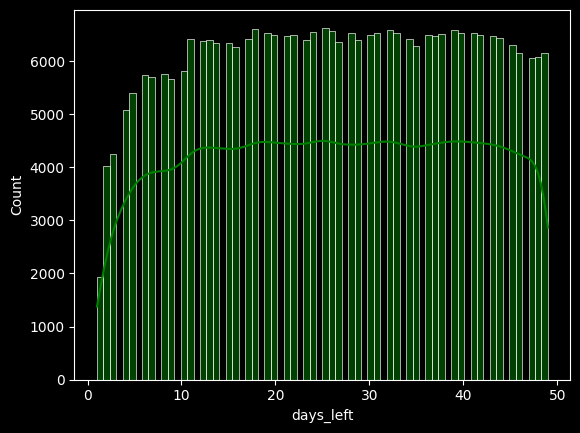

In [ ]:
sns.histplot(df['days_left'], kde=True, color='green')
plt.show()

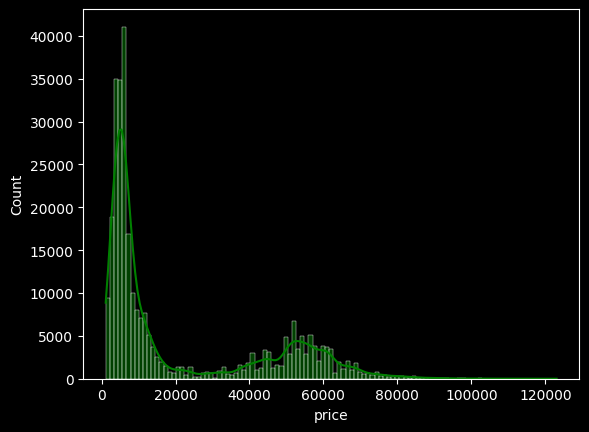

In [ ]:
sns.histplot(df['price'], kde=True, color='green')
plt.show()

In [ ]:
# Verifions la normalité
from scipy.stats import shapiro
stat, p = shapiro(df['price'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.752, p=0.000


In [ ]:
# Vérifions la relation
from scipy.stats import pearsonr, spearmanr
spearmanr(df['price'], df['days_left'])

SignificanceResult(statistic=np.float64(-0.26701898446039224), pvalue=np.float64(0.0))

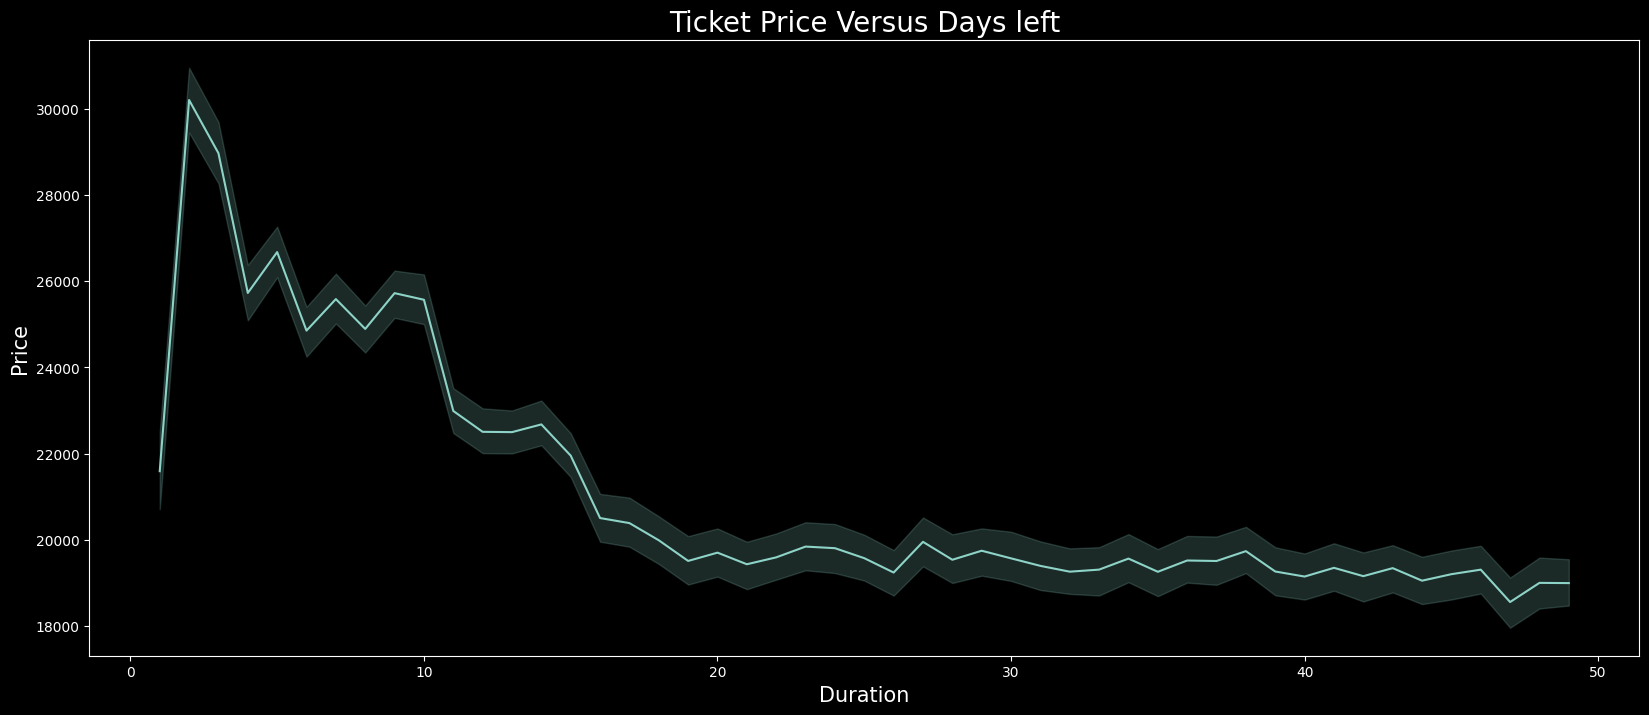

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',palette='hls')
plt.title('Ticket Price Versus Days left',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [ ]:
# Que peut on conclure ? Interpretez le résultats.

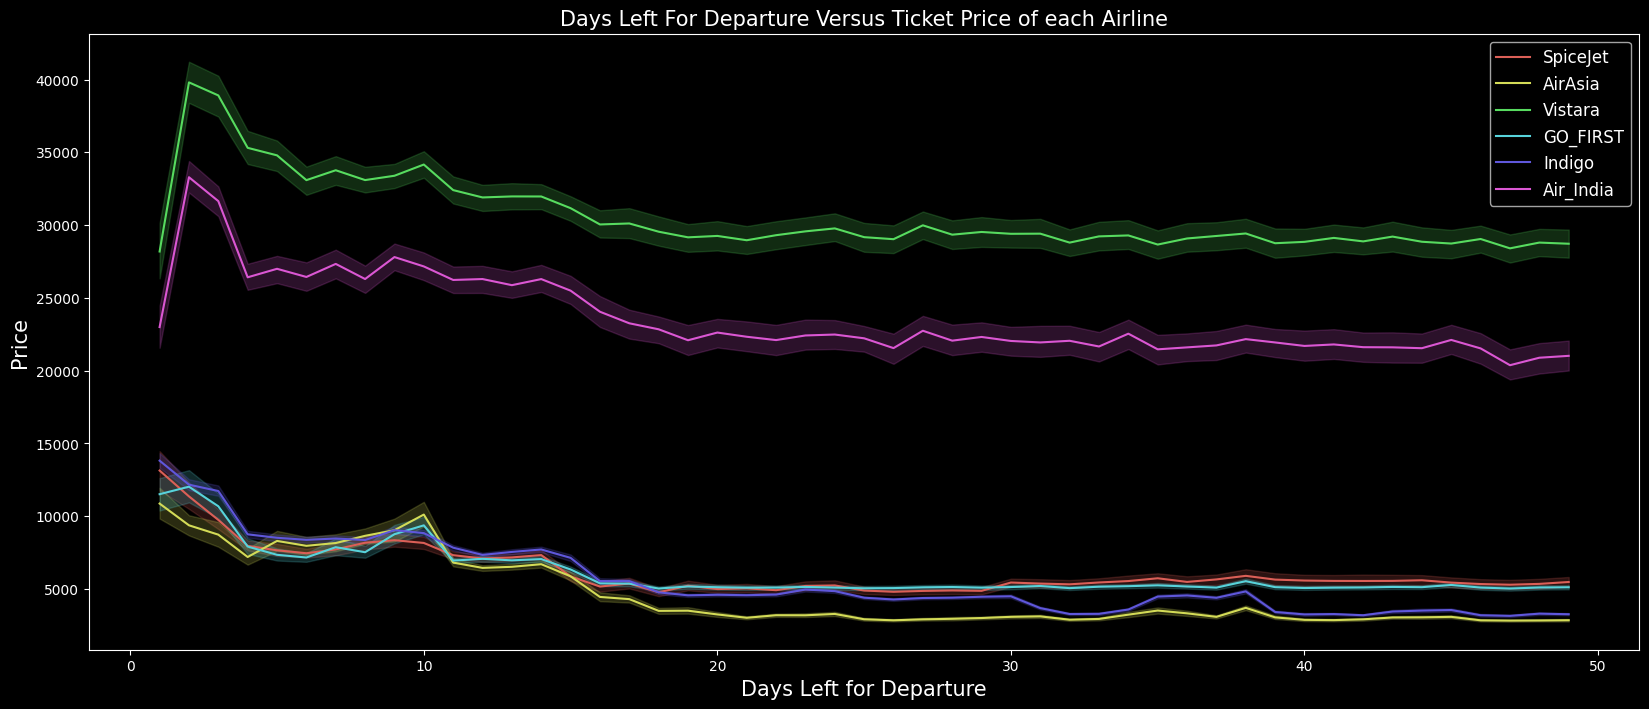

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

## **Aggregation**

Calculer le prix moyen pour chaque valeur de days_left, afin d'étudier comment le prix varie en fonction du nombre de jours avant le départ.

Refaire la visualisation précedante

,days_left,mean_price
count,49.00000,49.000000
mean,25.00000,21116.250944
std,14.28869,2861.648185
min,1.00000,18553.272038
25%,13.00000,19306.271739
50%,25.00000,19590.667385
75%,37.00000,22498.885384
max,49.00000,30211.299801


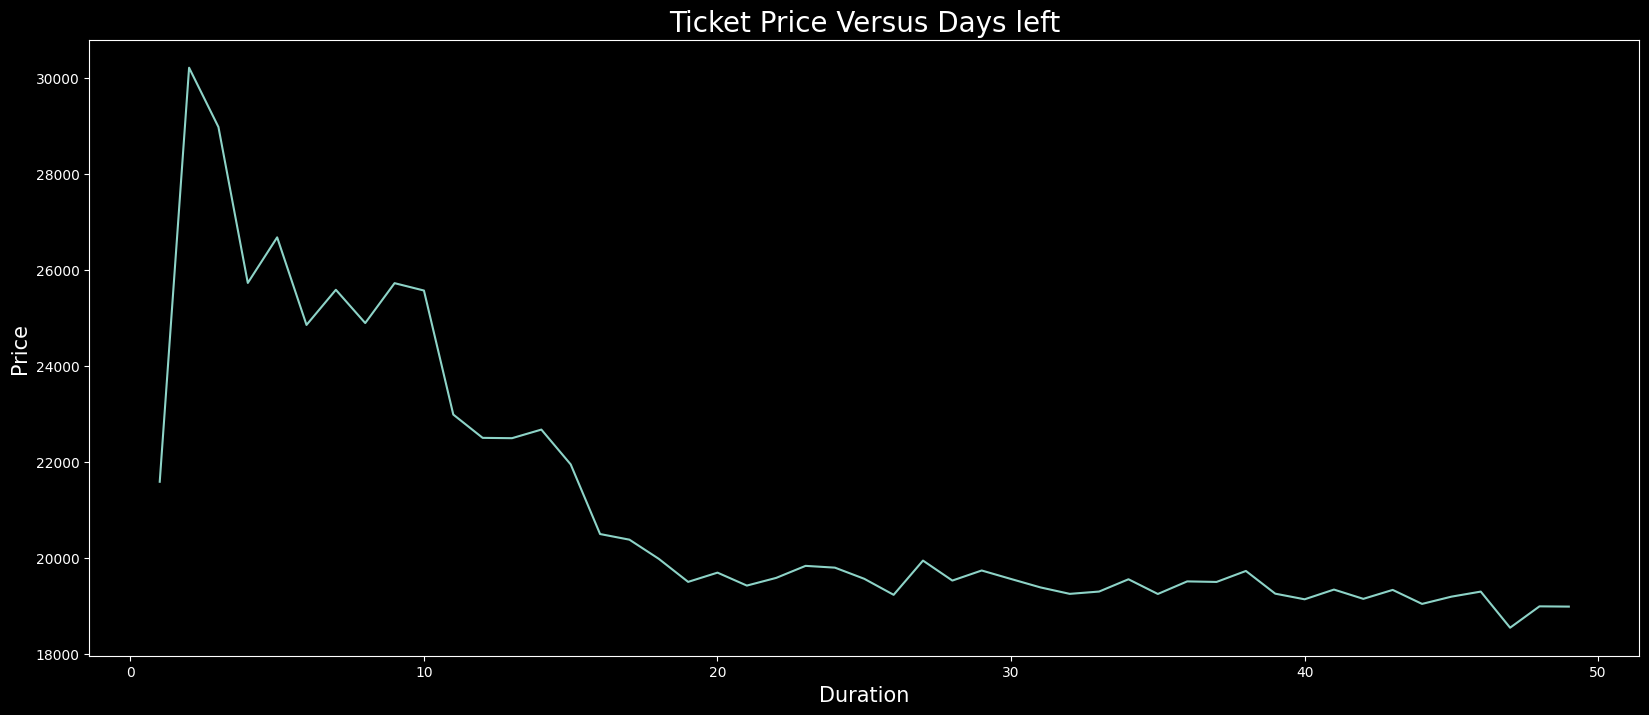

# **Model de regression Lineaire**

### 📌 Définition

> La **régression linéaire** est une méthode statistique qui permet de **modéliser la relation entre une variable dépendante** (cible) et **une ou plusieurs variables indépendantes** (explicatives), en supposant une relation **linéaire**.

---

### 🧮 Formule mathématique (simple)

y=β0​+β1​x+ε

- \( y \) : variable cible (ex. : prix)  
- \( x \) : variable explicative (ex. : days_left)  
- \( β_0 \) : intercept (valeur de y quand x = 0)  
- \( β_1 \) : pente (variation de y quand x augmente de 1)  
- \( ε \) : erreur aléatoire (bruit)

---

### 🎯 Objectif

Trouver les coefficients \( β_0 \) et \( β_1 \) qui **minimisent l’erreur entre les valeurs prédites et réelles**, souvent via la méthode des **moindres carrés** (*Mean Squared Error*, MSE).

---

### 📊 Interprétation

- Si \( β_1 > 0 \) → y **augmente** avec x  
- Si \( β_1 < 0 \) → y **diminue** avec x  
- Si \( β_1 = 0 \) → x n’a **aucun impact linéaire** sur y

---

### ✅ Quand l’utiliser ?

- Pour **prédire** une variable numérique (ex. : prix, temps, score)  
- Pour **mesurer l’influence d’un facteur explicatif**  
- Lorsque la relation entre les variables est **environ linéaire** (vérifiable avec un graphique de dispersion ou une corrélation)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# A copy of agg
agg1=agg.copy()

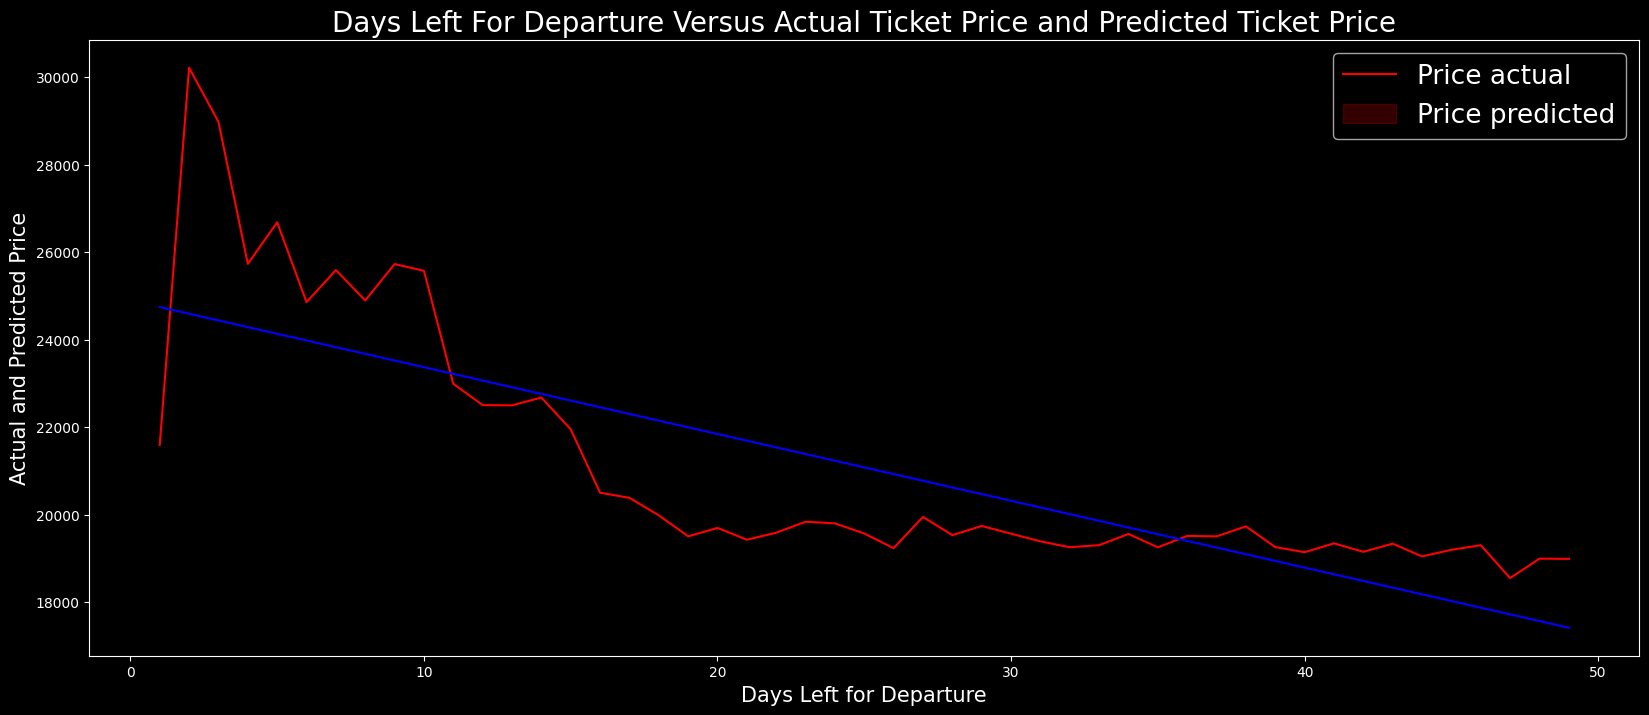

,metric,value
0,coef_log_days,-152.581454
1,intercept,24896.621447
2,test_R2,0.833889
3,test_RMSE,1056.953022
4,pred_mean_J1,24790.860042
5,pred_mean_J30,24372.658686
6,pred_diff_J1_minus_J30,418.201357


In [ ]:
import statsmodels.api as sm

# 🔁 Ajout de l’intercept manuellement pour statsmodels
X_train_sm = sm.add_constant(X_train)  # ajoute colonne 'const' = 1
X_test_sm = sm.add_constant(X_test)

# Régression avec statsmodels
ols = sm.OLS(y_train, X_train_sm).fit()

# 🔍 Résumé avec p-valeurs
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:             mean_price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     53.27
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           1.14e-08
Time:                        08:26:25   Log-Likelihood:                -348.74
No. Observations:                  39   AIC:                             701.5
Df Residuals:                      37   BIC:                             704.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.49e+04    600.550     41.456      0.0

# **Model de regression Lineaire Logarithmique**

In [ ]:
X = np.log(agg1['days_left'])
y = agg1['mean_price']


✅ RMSE : 909.21
✅ R² : 0.8771


In [ ]:
out=pd.DataFrame({'Price_pred':y_pred_all})
result=agg1.merge(out,left_index=True,right_index=True)

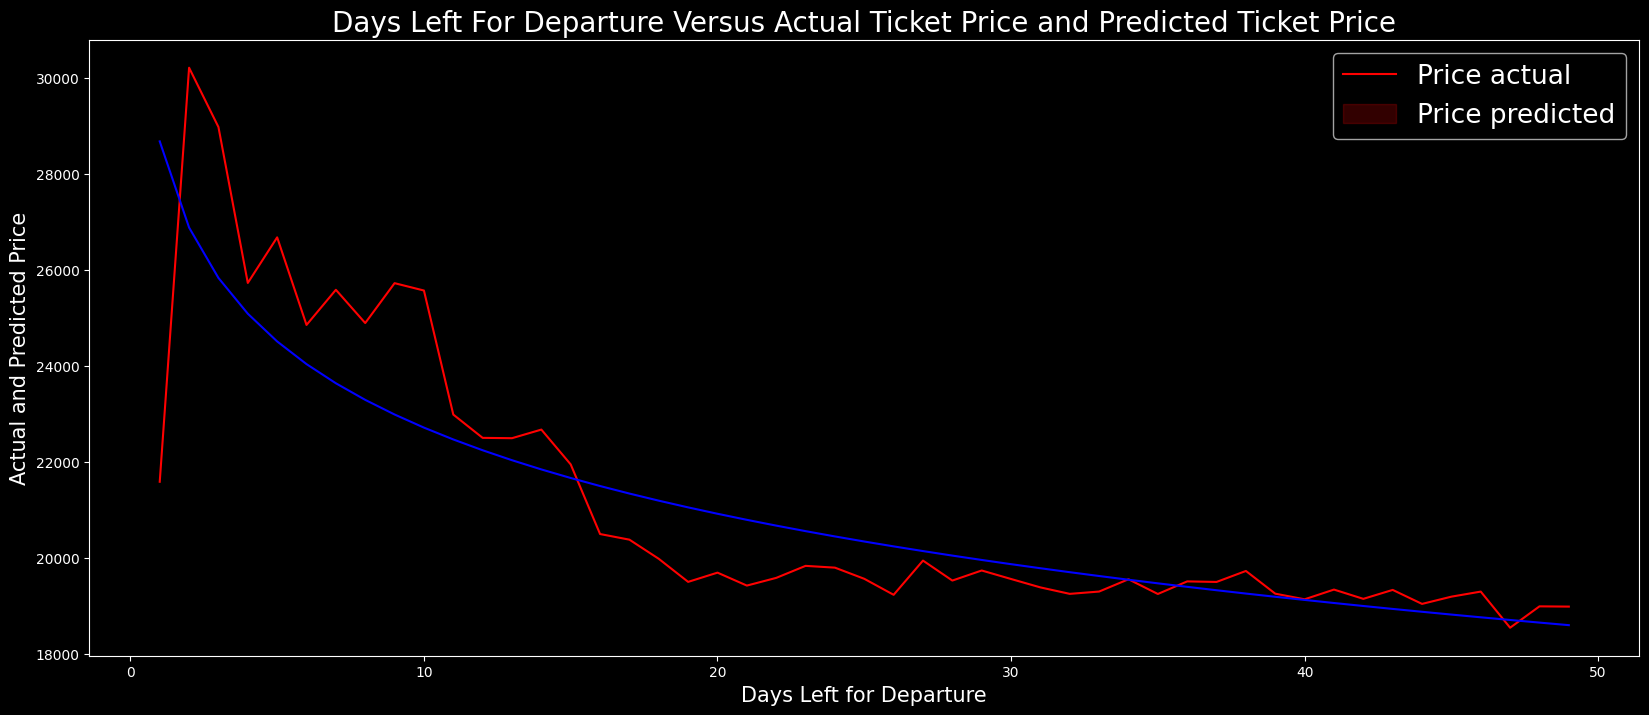

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='mean_price',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

def predict_at_day(day):
    return float(model_log.predict(np.array([[np.log1p(day)]])).ravel()[0])

pred_j1 = predict_at_day(1)
pred_j30 = predict_at_day(30)
diff_pred = pred_j1 - pred_j30

summary_model = pd.DataFrame({
    "metric": ["coef_log_days","intercept","test_R2","test_RMSE","pred_mean_J1","pred_mean_J30","pred_diff_J1_minus_J30"],
    "value": [model_log.coef_[0], model_log.intercept_, r2, rmse, pred_j1, pred_j30, diff_pred]
})
summary_model

,metric,value
0,coef_log_days,-2587.805410
1,intercept,28677.996618
2,test_R2,0.877083
3,test_RMSE,909.206635
4,pred_mean_J1,26884.266594
5,pred_mean_J30,19791.505952
6,pred_diff_J1_minus_J30,7092.760642


In [ ]:
# 🔁 Ajout de l’intercept manuellement pour statsmodels
X_train_sm = sm.add_constant(X_train)  # ajoute colonne 'const' = 1
X_test_sm = sm.add_constant(X_test)

# Régression avec statsmodels
ols_log = sm.OLS(y_train, X_train_sm).fit()

# 🔍 Résumé avec p-valeurs
print(ols_log.summary())


                            OLS Regression Results                            
Dep. Variable:             mean_price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     75.58
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           1.80e-10
Time:                        08:26:25   Log-Likelihood:                -344.44
No. Observations:                  39   AIC:                             692.9
Df Residuals:                      37   BIC:                             696.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.868e+04    911.325     31.468      0.0

# **Model de regression Lineaire Polynomiale**

### 📌 Définition : Régression Linéaire **Polynomiale**

> La **régression polynomiale** est une extension de la régression linéaire où on modélise une **relation non-linéaire** entre la variable cible \( y \) et la variable explicative \( x \), en ajoutant des **puissances de \( x \)** comme nouvelles variables.

---

### 🧮 Formule mathématique (exemple degré 2)

\[
y = β_0 + β_1 x + β_2 x^2 + ε
\]


On peut généraliser à n'importe quel **degré \( d \)** :

---

### 🎯 Objectif

Trouver les coefficients β qui **minimisent l'erreur entre les prédictions et les vraies valeurs**, tout en **capturant une relation non linéaire**.

---

### 📊 Interprétation

- Le modèle peut **s'adapter à des courbes** (en U, en cloche, etc.)
- Les **signes et valeurs** des coefficients donnent des indications sur la **forme de la relation**

---

### ⚠️ Attention

- Trop augmenter le degré → risque de **surajustement (overfitting)**  
- Toujours **visualiser la courbe** pour comprendre le comportement du modèle  
- Il reste un **modèle linéaire dans les coefficients**, pas dans les variables

---

### ✅ Quand l’utiliser ?

- Quand la relation entre \( x \) et \( y \) **n’est pas linéaire**  
- Quand un nuage de points **suit une courbe** (parabolique, cubique…)  
- Pour **modéliser des effets non linéaires tout en gardant une structure simple**


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = agg1['days_left']
y = agg1['mean_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Pipeline avec transformation polynomiale degré 2
poly_model = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Reshape X_train and X_test to be 2-dimensional arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)

y_pred = poly_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ R² : {r2:.4f}")

✅ RMSE : 661.15
✅ R² : 0.9350


In [ ]:
y_pred_all = poly_model.predict(X.values.reshape(-1, 1))

In [ ]:
out=pd.DataFrame({'Price_pred':y_pred_all})
result=agg1.merge(out,left_index=True,right_index=True)

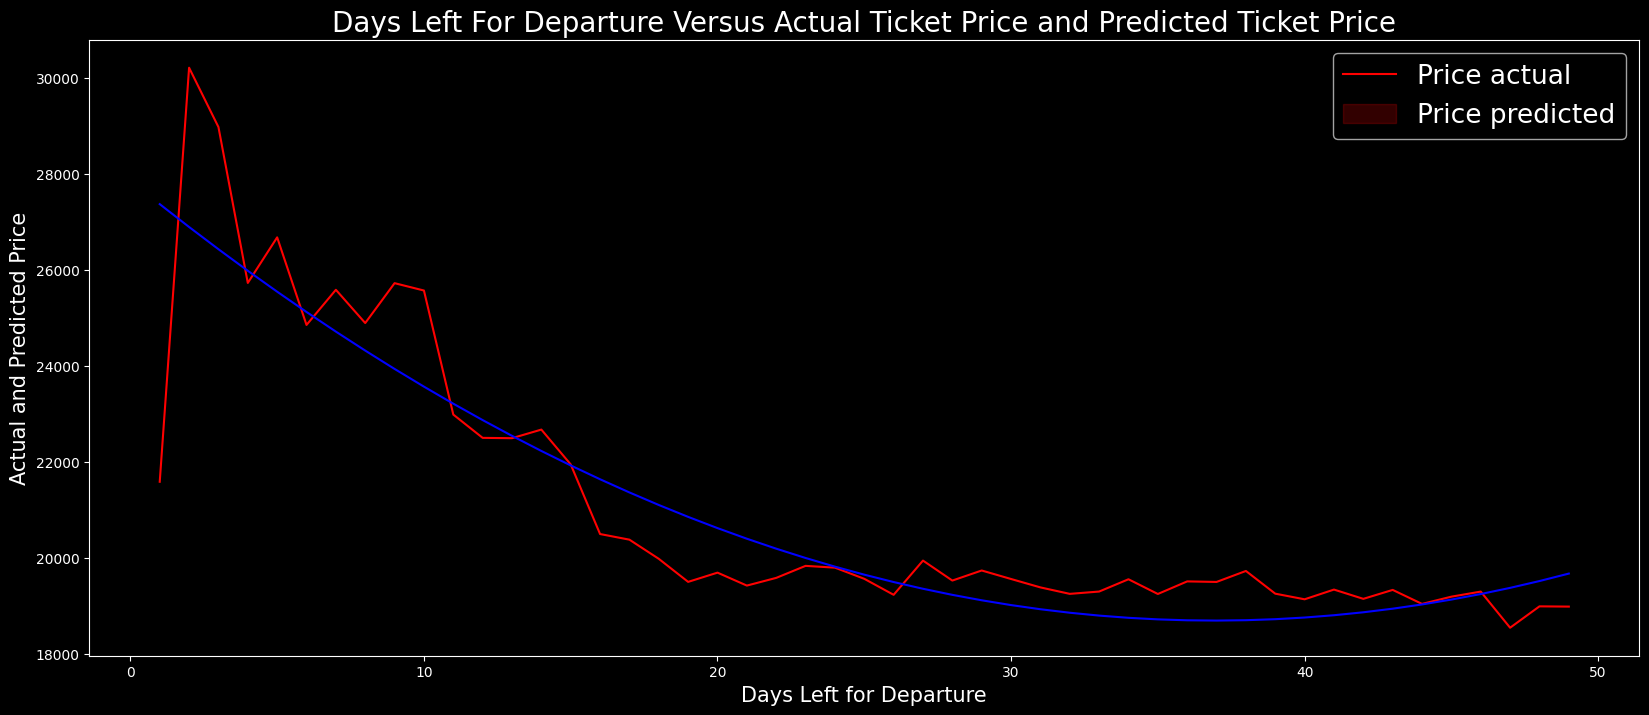

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='mean_price',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

def predict_at_day(day):
    return float(poly_model.predict(np.array([[day]])).ravel()[0])

pred_j1 = predict_at_day(1)
pred_j30 = predict_at_day(30)
diff_pred = pred_j1 - pred_j30

summary_model = pd.DataFrame({
    "metric": ["coef_poly","intercept","test_R2","test_RMSE","pred_mean_J1","pred_mean_J30","pred_diff_J1_minus_J30"],
    "value": [poly_model.steps[-1][1].coef_, poly_model.steps[-1][1].intercept_, r2, rmse, pred_j1, pred_j30, diff_pred]
})
summary_model

,metric,value
0,coef_poly,"[0.0, -496.00812042242836, 6.715513733133321]"
1,intercept,27860.842846
2,test_R2,0.935004
3,test_RMSE,661.151892
4,pred_mean_J1,27371.550239
5,pred_mean_J30,19024.561593
6,pred_diff_J1_minus_J30,8346.988646


In [ ]:
# Création des features polynomiales manuellement
# Revert X_train to 1D before creating DataFrame for statsmodels
X_train_1d = X_train.ravel()

X_poly = pd.DataFrame({
    "x": X_train_1d,
    "x2": X_train_1d**2
})

# 🔁 Ajout de l’intercept manuellement pour statsmodels
X_train_sm = sm.add_constant(X_poly)  # ajoute colonne 'const' = 1

# Reshape X_test to be 2-dimensional arrays for statsmodels
# X_test was already reshaped for sklearn, but ensure it's 1D for statsmodels
X_test_1d = X_test.ravel()
X_test_poly = pd.DataFrame({
    "x": X_test_1d,
    "x2": X_test_1d**2
})
X_test_sm = sm.add_constant(X_test_poly)

# Régression avec statsmodels
ols_log = sm.OLS(y_train.reset_index(drop=True), X_train_sm).fit()

# 🔍 Résumé avec p-valeurs
print(ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:             mean_price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     63.90
Date:                Sat, 16 Aug 2025   Prob (F-statistic):           1.43e-12
Time:                        08:26:25   Log-Likelihood:                -336.59
No. Observations:                  39   AIC:                             679.2
Df Residuals:                      36   BIC:                             684.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.786e+04    693.486     40.175      0.0

**Essayer le degre 3**

## **Regression sur les données bruites**

# **Model de regression Lineaire**

In [ ]:
# Une copie de df
df1=df.copy()

In [ ]:
df1.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

# **Model de regression Lineaire Logarithmique**

✅ RMSE : 22481.85
✅ R² : 0.0115


# **Model de regression Lineaire Polynomiale**

## **Ajoutons duration**

In [ ]:
X = df1[['days_left', 'duration']]
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

"""
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(X_train)
X_test=mmscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
"""
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ R² : {r2:.4f}")

✅ RMSE : 22037.76
✅ R² : 0.0502


In [ ]:
y_pred_all = model.predict(X)

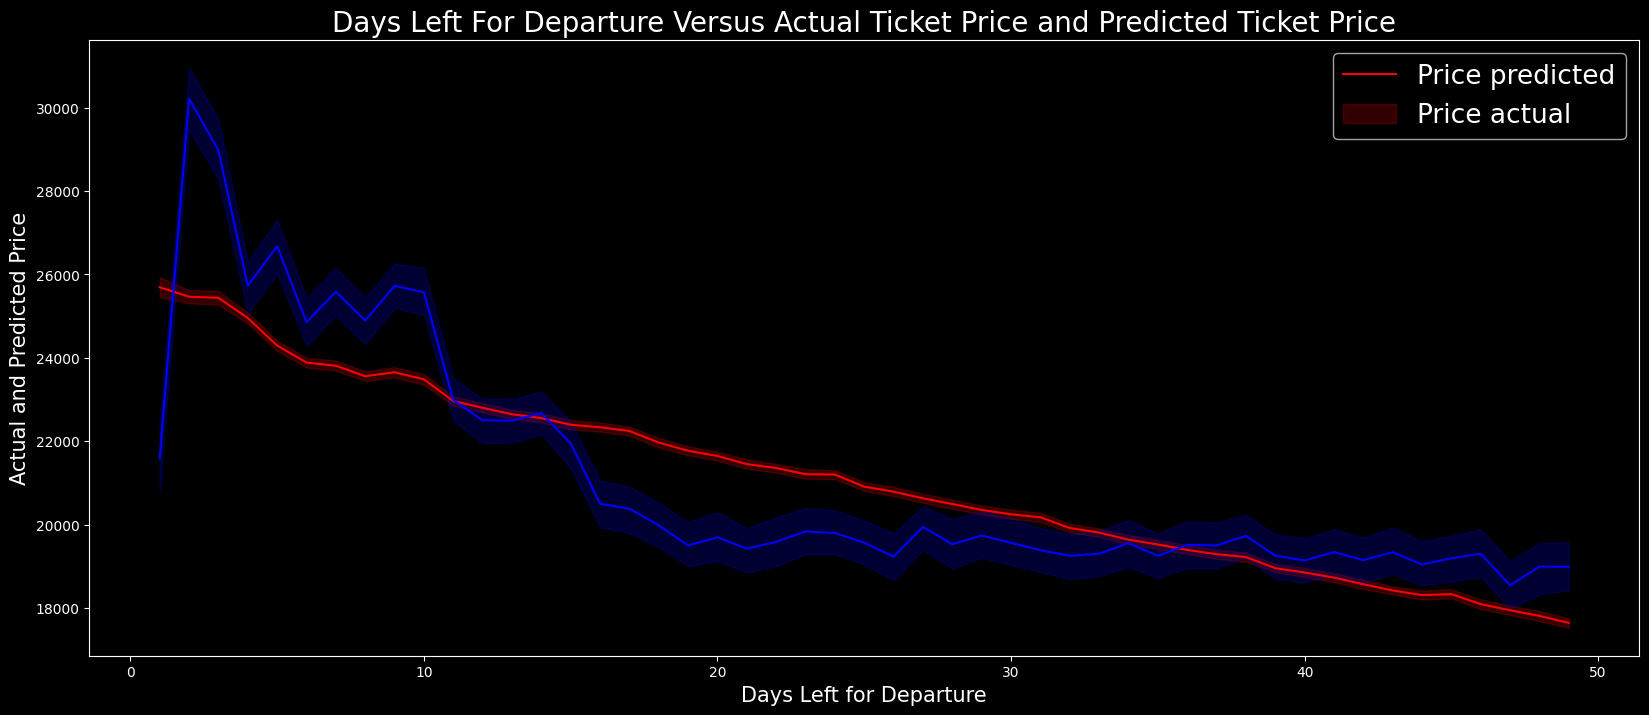

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df1['days_left'],y=y_pred_all,color='red')
sns.lineplot(data=result,x=df1['days_left'],y=df1['price'],color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price predicted', 'Price actual'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

In [ ]:
X = np.log(df1[['days_left', 'duration']])
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

"""
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(X_train)
X_test=mmscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
"""
model_log = LinearRegression()
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ R² : {r2:.4f}")

✅ RMSE : 21796.44
✅ R² : 0.0709


In [ ]:
y_pred_all = model_log.predict(X)

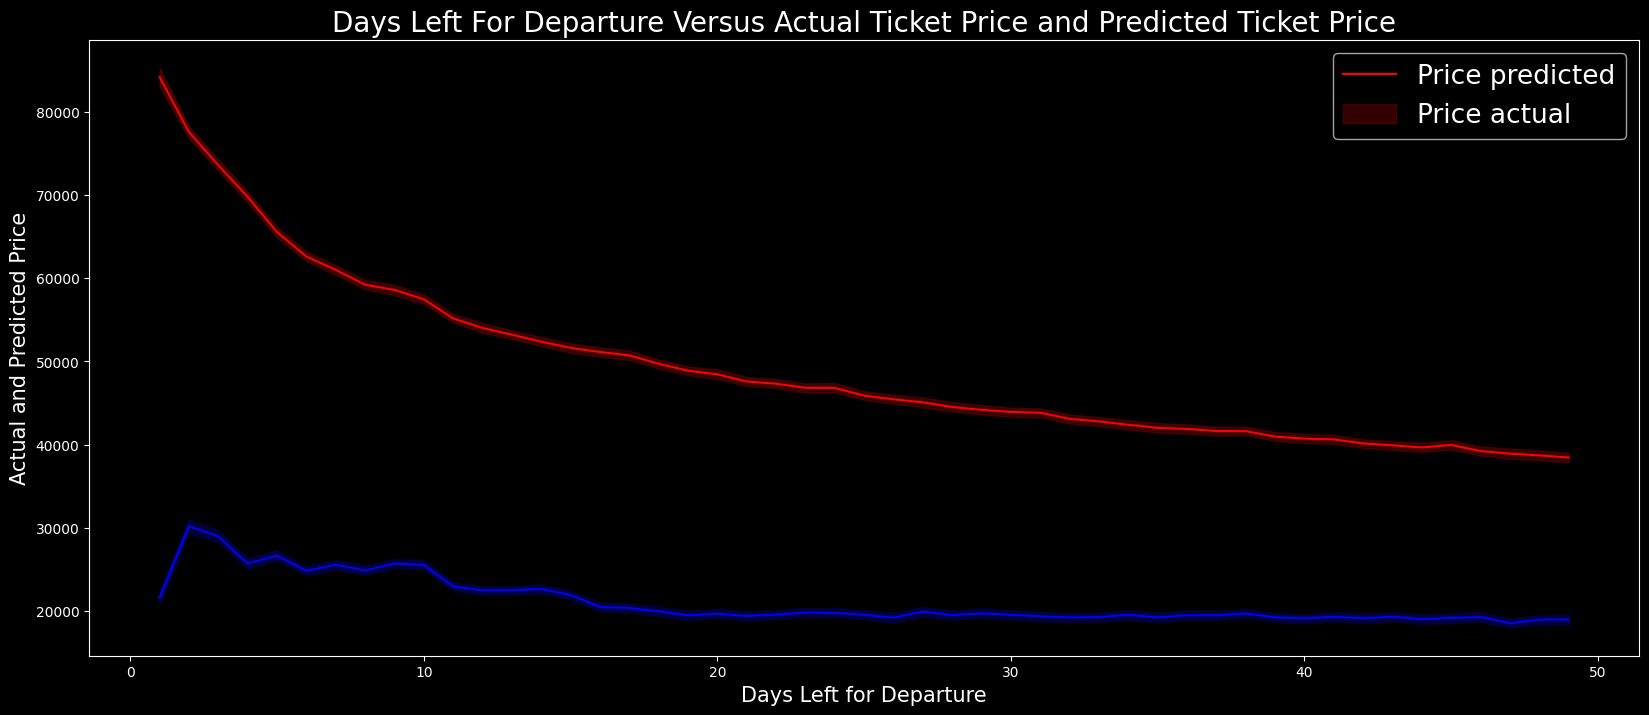

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df1['days_left'],y=y_pred_all,color='red')
sns.lineplot(data=result,x=df1['days_left'],y=df1['price'],color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price predicted', 'Price actual'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

# **Plusieurs regresseurs**

### 📊 Comparison of Regressor Models

| Regressor                    | Type               | Regularization | Non-linear Support | Ensemble Method     | Notes |
|-----------------------------|--------------------|----------------|--------------------|----------------------|-------|
| `LinearRegression`          | Linear             | ❌ No          | ❌ No              | ❌ No                | Basic linear model |
| `Ridge`                     | Linear             | ✅ L2          | ❌ No              | ❌ No                | Adds penalty for large coefficients |
| `DecisionTreeRegressor`     | Tree-based         | ❌ No          | ✅ Yes             | ❌ No                | Splits data into regions |
| `RandomForestRegressor`     | Tree ensemble      | ❌ Implicit    | ✅ Yes             | ✅ Yes (Bagging)     | Reduces overfitting vs trees |
| `SVR` (Support Vector)      | Kernel-based       | ✅ (C param)   | ✅ Yes (kernel)    | ❌ No                | Good for small, clean datasets |
| `xgb.XGBRegressor`          | Boosted Trees      | ✅ (L1/L2)     | ✅ Yes             | ✅ Yes (Boosting)    | Fast & powerful, handles missing values |
| `KNeighborsRegressor`       | Instance-based     | ❌ No          | ✅ Yes             | ❌ No                | Sensitive to scaling & noise |
| `ExtraTreesRegressor`       | Tree ensemble      | ❌ Implicit    | ✅ Yes             | ✅ Yes (Extremely randomized trees) | Faster than RF, more randomness |
| `BaggingRegressor`          | Meta-estimator     | ❌ Depends     | ✅ Yes             | ✅ Yes (Bagging)     | Wraps any base estimator |
| `GradientBoostingRegressor` | Boosted Trees      | ✅ Implicit    | ✅ Yes             | ✅ Yes (Boosting)    | Slower than RF, but more accurate |


In [ ]:
x = df1['days_left']
y = df1['price']

In [ ]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# Reshape X_train and X_test to be 2-dimensional arrays
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 1), (90046, 1), (210107,), (90046,))

In [ ]:
a={'Model Name':[], 'R2_score':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,R2_score,Adj_R_Square,Root_Mean_Squared_Error_RMSE


In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-1-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = pd.DataFrame([{
               'Model Name' : models,
               'R2_score' : metrics.r2_score(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred))}])
    Results = pd.concat([Results, new_row], ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Root Mean Squared Error (RMSE): 22586.445
R2_score: 0.00878
Adj R Square:  0.008777
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Root Mean Squared Error (RMSE): 22534.515
R2_score: 0.013333
Adj R Square:  0.01333
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Root Mean Squared Error (RMSE): 22534.517
R2_score: 0.013333
Adj R Square:  0.01333
------------------------------------------------------------------------------------------------------------
Model Name:  KNeighborsRegressor()
Root Mean Squared Error (RMSE): 24517.94
R2_score: -0.167998
Adj R Square:  -0.168002
------------------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesRegressor()
Root Mean Squared Error (RMSE): 22534.515
R2_score

In [ ]:
# Sort Results by Adj_R_square
Results = Results.sort_values(by='Adj_R_Square', ascending=False)
Results

,Model Name,R2_score,Adj_R_Square,Root_Mean_Squared_Error_RMSE
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.013384,0.013381,22533.935492
7,(DecisionTreeRegressor(random_state=1330879612...,0.013366,0.013363,22534.141057
6,"XGBRegressor(base_score=None, booster=None, ca...",0.013333,0.013330,22534.513973
1,DecisionTreeRegressor(),0.013333,0.013330,22534.514973
4,"(ExtraTreeRegressor(random_state=1656142833), ...",0.013333,0.013330,22534.514973
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.013333,0.013330,22534.516527
0,LinearRegression(),0.008780,0.008777,22586.445359
8,Ridge(),0.008780,0.008777,22586.445359
9,Lasso(alpha=0.1),0.008780,0.008777,22586.445378
3,KNeighborsRegressor(),-0.167998,-0.168002,24517.939887


In [ ]:
# Train and fit the model the best one: modeldcr = DecisionTreeRegressor()
modeldcr.fit(x_train, y_train)
y_pred = modeldcr.predict(x_test)

In [ ]:
y_pred_all = modeldcr.predict(x.values.reshape(-1, 1))

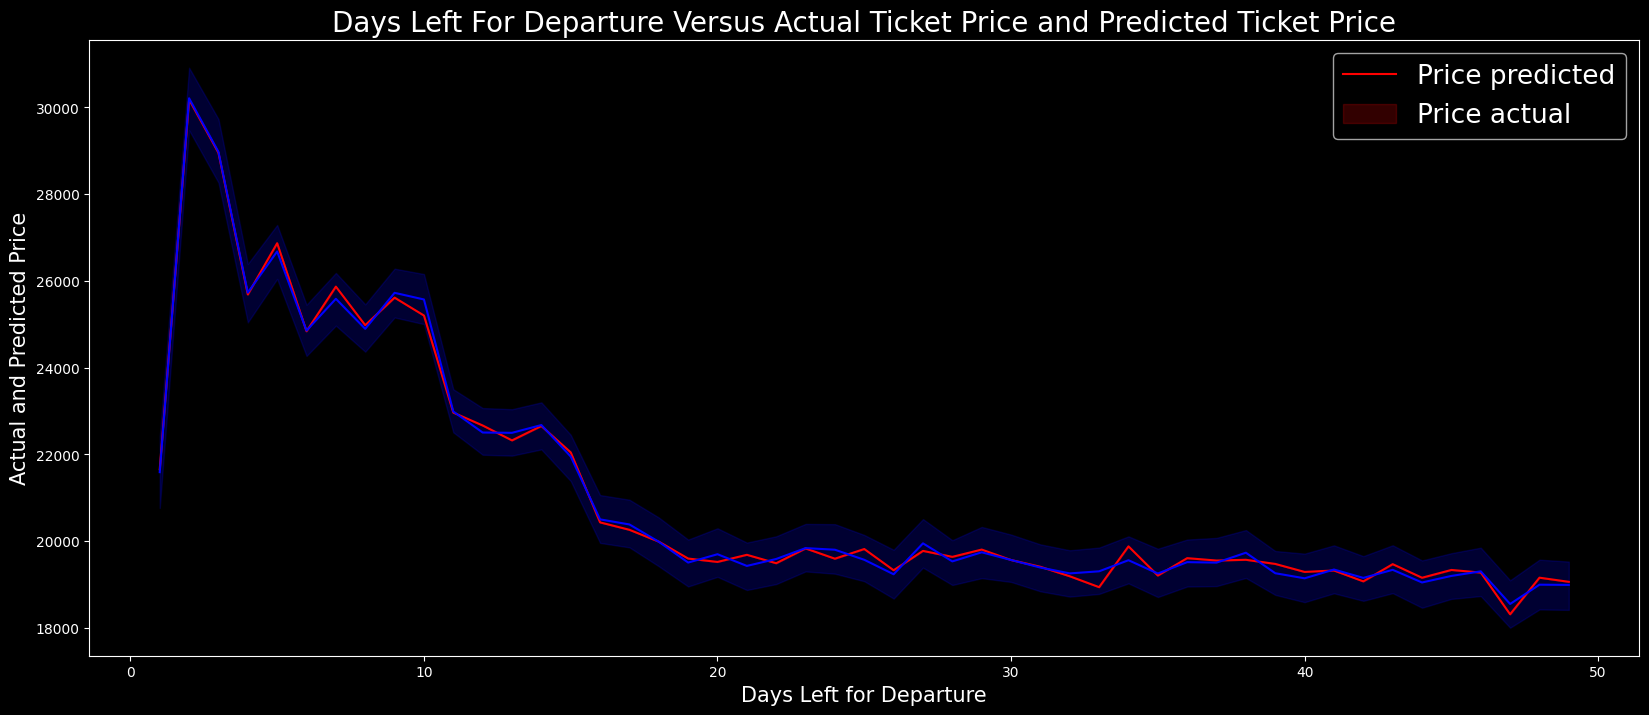

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df1['days_left'],y=y_pred_all,color='red')
sns.lineplot(data=result,x=df1['days_left'],y=df1['price'],color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price predicted', 'Price actual'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()